# Spam Filter (Spam or Ham)
## Raw text to Sentiment
Sample from: https://www.kaggle.com/ozlerhakan/neural-network-word-embedding-using-keras

The collection consists of '0030228_easy_ham.tar.bz2' and '20030228_spam.tar.bz2' taking from https://spamassassin.apache.org/old/publiccorpus/ i.e. Apache SpamAssassin’s public datasets.

There are 2500 ham and 500 spam emails in the dataset.

Note: All the numbers and URLs were converted to strings as NUMBER and URL respectively.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("spam_or_not_spam.csv")
df.head()

2023-06-19 11:20:21.733055: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [2]:
df.label.value_counts()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [3]:
df.dropna(inplace=True)
df.label.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


## Definition to Tokenize the inputs

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# definition to tokenize the inputs
def tokenizer_sequences(num_words, X):
    
    # when calling the texts_to_sequences method, only the top num_words are considered while
    # the Tokenizer stores everything in the word_index during fit_on_texts
    
    tokenizer = Tokenizer(num_words=num_words)
    
    # From doc: By default, all punctuation is removed, turning the texts into space-separated sequences of words
    tokenizer.fit_on_texts(X)
    sequences = tokenizer.texts_to_sequences(X)
    
    return tokenizer, sequences

## Parameters

In [5]:
# these could be further examined
max_words = 10000 
maxlen = 300

## Only use the X column (named email) and tokenize the inputs

In [6]:
tokenizer, sequences = tokenizer_sequences(max_words, df["email"].copy())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print("Using top: ", max_words,"tokens.")

print("Padding/shortining all emails to ", maxlen, "words.")
X = pad_sequences(sequences, maxlen=maxlen)
y = df["label"].values

np.random.seed(1)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
y = y[randomize]

print('Shape of data :', X.shape)
print('Shape of label:', y.shape)

print(X[:10])

Found 33672 unique tokens.
Using top:  10000 tokens.
Padding/shortining all emails to  300 words.
Shape of data : (2999, 300)
Shape of label: (2999,)
[[   0    0    0 ...    1    1    9]
 [ 369    1    1 ... 1024 1761 1134]
 [   0    0    0 ... 3012 1168 6746]
 ...
 [   0    0    0 ...  470  491    9]
 [   0    0    0 ... 2140 2465  254]
 [3160    4  471 ...  200    9    9]]


## 1D Cov ANN

Epoch 1/3


2023-06-19 11:20:42.151701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 11:20:42.177863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 11:20:42.178188: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 11:20:42.180231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-19 11:20:42.180564: I tensorflow/compile

75/75 [==============================] - 14s 125ms/step - loss: 0.3224 - acc: 0.8554 - val_loss: 0.1541 - val_acc: 0.9667
Epoch 2/3
75/75 [==============================] - 8s 107ms/step - loss: 0.1220 - acc: 0.9887 - val_loss: 0.1306 - val_acc: 0.9883
Epoch 3/3
75/75 [==============================] - 6s 82ms/step - loss: 0.1042 - acc: 0.9987 - val_loss: 0.0909 - val_acc: 0.9850


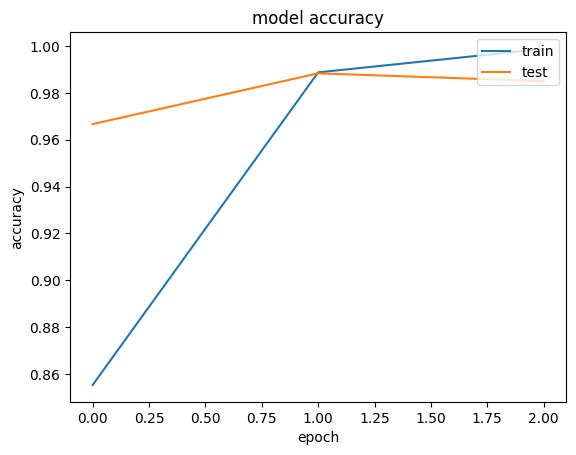

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from sklearn.model_selection import train_test_split


np.random.seed(1)

model = Sequential()

model.add(Embedding((max_words), 32, input_length=maxlen)) 
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X, y, validation_split=0.2, epochs=3, batch_size=32)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

2023-06-19 11:21:17.454099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 11:21:17.455220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 11:21:17.456991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/3


2023-06-19 11:21:17.825341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 11:21:17.826913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 11:21:17.827990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.4939 - acc: 0.8262

2023-06-19 11:21:29.263428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-19 11:21:29.265090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-19 11:21:29.266174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 12s 126ms/step - loss: 0.4939 - acc: 0.8262 - val_loss: 0.4537 - val_acc: 0.8300
Epoch 2/3
75/75 [==============================] - 8s 105ms/step - loss: 0.3813 - acc: 0.8454 - val_loss: 0.1727 - val_acc: 0.9667
Epoch 3/3
75/75 [==============================] - 7s 87ms/step - loss: 0.3652 - acc: 0.8641 - val_loss: 1.2958 - val_acc: 0.1700


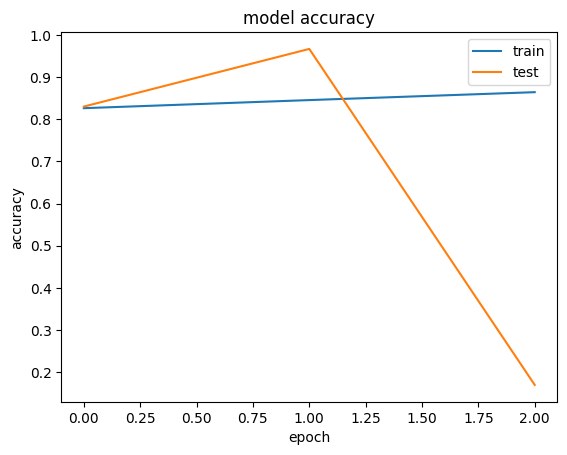

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split


np.random.seed(1)

model = Sequential()

model.add(Embedding((max_words), 32, input_length=maxlen)) 
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(8))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X, y, validation_split=0.2, epochs=3, batch_size=32)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()